# Getting Started with OpenCV


OpenCV (Open Source Computer Vision) is a widely acclaimed open-source library that forms the backbone of many computer vision applications. With a rich history dating back to its inception in 1999, OpenCV has evolved into a versatile toolkit that empowers developers to create innovative solutions in the field of image and video analysis. Released under a permissive BSD license, OpenCV has garnered a strong community of researchers, engineers, and enthusiasts who contribute to its growth and enhancement {cite:p}`opencv_library, OpenCVDocumentation`.

CV2, often referred to as "opencv-python," is the Python wrapper for the OpenCV library. This wrapper brings the power of OpenCV's vast functionality to the Python programming ecosystem, making it accessible and convenient for Python developers. With CV2, you can perform a wide range of tasks, including image processing, feature extraction, object detection, video analysis, and more, using the intuitive and expressive syntax of Python.

CV2's integration with Python has contributed to its popularity and ubiquity in the field of computer vision. It offers a comprehensive suite of functions and tools that enable users to manipulate, analyze, and interpret visual data effortlessly. From simple tasks like image resizing and filtering to complex tasks such as building deep learning models for image recognition, CV2 provides the necessary building blocks.

## Sample Images

In this section, we employ `Lunenburg.jpg` and `Varenna.jpg` from my personal image library. Both images were adjusted to a size of 2000 by 1500 to facilitate more straightforward calculations.

* [Lunenburg](https://en.wikipedia.org/wiki/Lunenburg,_Nova_Scotia) (a town in Nova Scotia, Canada) is known for its well-preserved colonial architecture and UNESCO World Heritage status. 

* [Varenna](https://en.wikipedia.org/wiki/Varenna) features the picturesque village of Varenna on the shores of Lake Como, Italy, celebrated for its charming waterfront and stunning natural beauty.

In [1]:
from skimage import io

# Initialize empty list for storing images
Images = []

# Define image names and their corresponding URLs
Names = ['Lunenburg', 'Varenna']
Urls = [f'https://raw.githubusercontent.com/HatefDastour/ENGG_680/main/Files/{name}.jpg' for name in Names]

# Load images from the specified URLs and create a dictionary with image names as keys
Images = [io.imread(url) for url in Urls]
Images_dict = dict(zip(Names, Images))

<font color='Blue'><b>Example:</b></font>

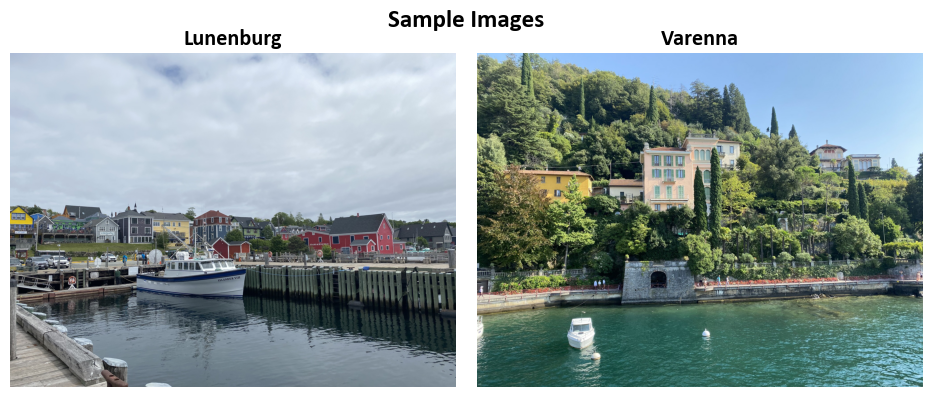

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt  # Import the plotting library

# Set font properties for plots
plt.rcParams.update({'font.family': 'Calibri', 'axes.titlesize': 16})

# Define a function to display images with titles and optional settings
def ImShow(Images, Names, title='Images', grayscale=False, figsize=(9.5, 4)):
    '''
    Display a pair of images side by side.

    Parameters:
    Images (list): List of two images to be displayed.
    Names (list): List of two names or labels for the images.
    title (str, optional): Title for the figure. Defaults to 'Images'.
    grayscale (bool, optional): If True, display images in grayscale. Defaults to False.
    figsize (tuple, optional): Figure size (width, height) in inches. Defaults to (9.5, 4).

    Returns:
    matplotlib.figure.Figure: The figure containing the displayed images.
    numpy.ndarray: The array of subplots for further manipulation.
    '''
    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=figsize)  # Create a figure with 1 row and 2 columns of subplots
    ax = ax.ravel()  # Flatten the subplots for easier manipulation

    # Iterate over the first two images
    for i in range(2):
        # Display the image in grayscale if grayscale is True, otherwise in color
        ax[i].imshow(Images[i], cmap='gray' if grayscale else None)
        ax[i].set_aspect(1)  # Set aspect ratio to 1 (square aspect)
        ax[i].axis('off')  # Turn off axis
        ax[i].set_title(Names[i], weight='bold')  # Set image title with bold font

    if title:
        # Set main title if provided
        fig.suptitle(title, weight='bold', fontsize=18)

    plt.tight_layout()  # Adjust layout for better spacing
    return fig, ax

# Display the original images
_, _ = ImShow(Images, Names, title='Sample Images')  # Call the ImShow function to display images

## Accessing and Manipulating Pixel Values in Images

To gain precise control over pixel values within an image, we leverage the versatile `split` function {cite:p}`opencv_library, OpenCVDocumentation`. This function proves invaluable in dissecting the intricate tapestry of color channels present within an image.

In the digital imaging realm, each channel corresponds to a distinct color component. In the ubiquitous RGB color model, we encounter the vibrant Red, Green, and Blue channels. Alternatively, the CMYK model introduces Cyan, Magenta, Yellow, and Black channels. These models, alongside others, collectively govern an image's appearance through their distinctive channels.

```{figure} CMYK_RGB.jpg
---
width: 400px
align: center
---
CMYK (left) and RGB (right) color models.
```

In [3]:
import cv2

# Load an example image from the 'Images' dataset
Img = Images_dict['Lunenburg']

# Split the channels of the image into B (Blue), G (Green), and R (Red) channels
B, G, R = cv2.split(Img)

# Calculate the size (shape) of each channel
size_B = B.shape
size_G = G.shape
size_R = R.shape

# Print the sizes of B, G, and R channels
print("Size of B channel (Blue):", size_B)
print("Size of G channel (Green):", size_G)
print("Size of R channel (Red):", size_R)

Size of B channel (Blue): (1500, 2000)
Size of G channel (Green): (1500, 2000)
Size of R channel (Red): (1500, 2000)


The following line of code utilizes the `cv2.split()` function to split the channels of the first image in the 'Images' dataset. This function separates the image into its individual color channels, where `B` corresponds to the Blue channel, `G` to the Green channel, and `R` to the Red channel. These channels represent the components that collectively create the image's color when combined.

```{figure} CV2_BGR.png
---
width: 450px
align: center
---
Visual representation of `B, G, R = cv2.split(Img)`.
```

Alternatively, we can access the red, green, and blue channels of `Img` using the indexing syntax `Img[:,:,0]`, `Img[:,:,1]`, and `Img[:,:,2]`. This concise notation allows direct access to each color channel within the image, where the indices 0, 1, and 2 correspond to the red, green, and blue channels respectively. This indexing approach provides a convenient and efficient way to work with individual color channels, enabling focused manipulation and analysis of the image's color components.

```{figure} RGB_bands.png
---
width: 300px
align: center
---
Visual representation of the three bands of `Img`.
```

`````{admonition} Remark
:class: important

The order of the three color channels in an image and the output of `cv2.split(img)` in OpenCV might appear different due to how they represent the color information. This difference stems from historical conventions and the way images are stored in memory.

**RGB Order in Images:**

In standard RGB (Red, Green, Blue) images, the channels are typically arranged in the following order:

1. <font color='Red'><b>Red (R)</b></font>
2. <font color='Green'><b>Green (G)</b></font>
3. <font color='Blue'><b>Blue (B)</b></font>

This order is based on human perception and the way colors are traditionally represented in digital imaging. The red channel contains information about the intensity of red in each pixel, followed by green and then blue.

**OpenCV's `cv2.split(img)` Order:**

OpenCV, which is primarily used for computer vision and image processing tasks, often follows a different convention when splitting color channels using `cv2.split(img)`. The order is as follows:

1. <font color='Blue'><b>Blue (B)</b></font>
2. <font color='Green'><b>Green (G)</b></font>
3. <font color='Red'><b>Red (R)</b></font>

This order might seem counterintuitive when compared to the RGB order, but it is used for compatibility with certain image processing algorithms and the way images are stored in memory in the BGR (Blue, Green, Red) format.

It's important to be aware of this difference when working with OpenCV, especially if you are integrating it with other libraries or software that expect RGB order. You may need to reorder the channels if necessary.

`````

<font color='Blue'><b>Example:</b></font>

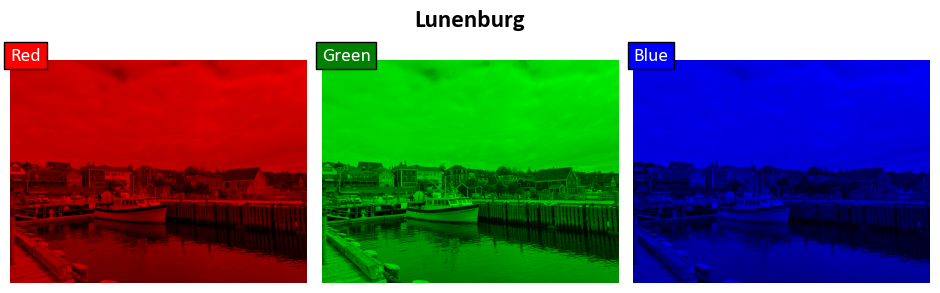

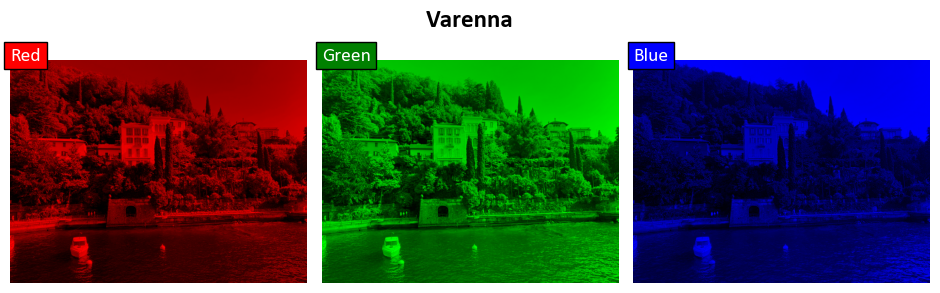

In [4]:
import matplotlib.pyplot as plt

for name, image in Images_dict.items():
    # Create a figure with three subplots to display the color channels
    fig, axes = plt.subplots(1, 3, figsize=(9.5, 3.0))
    axes = axes.ravel()  # Flatten the subplots for easier manipulation

    # Set the main title to the name of the image
    _ = fig.suptitle(name, weight='bold', fontsize=18)

    # Iterate over the three color channels
    for i, (ax, channel_name) in enumerate(zip(axes, ['Red', 'Green', 'Blue'])):
        # Create an image with all zeros (black image) of the same size as the original image
        channel_image = 0 * image
        # Assign the values of the current color channel to the corresponding channel in the black image
        channel_image[:, :, i] = image[:, :, i]
        # Display the image for the current color channel in the subplot
        _ = ax.imshow(channel_image)
        # Set aspect ratio to 1 to avoid stretching
        _ = ax.set_aspect(1)
        # Turn off axis for cleaner visualization
        _ = ax.axis('off')
        # Add text label indicating the color channel
        _ = ax.text(x=0, y=0, s=channel_name, size=14,
                    color='White', bbox=dict(boxstyle="square", ec='k', fc= channel_name))

    plt.tight_layout()

Here's an explanation of the code:

The code then iterates over the three color channels: Red, Green, and Blue. For each channel:
   - It creates a black image of the same size as the original image using `channel_image = 0 * image`. This black image has the same dimensions as the original but contains all zeros, essentially creating a black canvas for the channel.
   - It assigns the values of the current color channel from the original image to the corresponding channel in the black image. This isolates the specific color channel.
   - It displays the isolated color channel image in the current subplot using `ax.imshow(channel_image)`.
   - Sets the aspect ratio to 1 to avoid stretching the displayed image.
   - Turns off the axis to provide a cleaner visualization.
   - Adds a text label indicating the color channel name (e.g., "Red," "Green," or "Blue") on top of the subplot.

## Adding Padding: Exploring Border Types in OpenCV (Optional Content)

In image processing, padding or adding borders to an image is a common operation, often used in tasks like convolution or resizing. OpenCV provides several border types, each with its own unique behavior {cite:p}`opencv_library, OpenCVDocumentation`. The `cv2.copyMakeBorder` function in OpenCV is used to create a new image (destination, `dst`) by adding a border around the original image (source, `src`). The border is created based on the specified parameters, such as the offset, border type, and value of the border pixels. Here's an explanation of the function signature:

```
cv2.copyMakeBorder(src, dst, offset, bordertype, value=(0, 0, 0, 0)) -> None
```

- `src`: The source image, which is the input image to which the border will be added.
- `dst`: The destination image, where the result (image with border) will be stored. It should have the size of the output image, which can be calculated based on the input image and the specified offset.
- `offset`: A tuple `(top, bottom, left, right)` that specifies the number of pixels for each side (top, bottom, left, right) by which the image will be extended with the border.
- `bordertype`: The type of border to be added, specified as an integer constant. Common border types include `cv2.BORDER_CONSTANT`, `cv2.BORDER_REPLICATE`, `cv2.BORDER_REFLECT`, and others.
- `value`: The value of the border pixels. This parameter is optional and is only used when the `bordertype` is set to `cv2.BORDER_CONSTANT`. The default value is `(0, 0, 0, 0)`, which corresponds to black in grayscale images.

The `cv2.copyMakeBorder` function modifies the `dst` image by adding a border around the `src` image based on the specified offset and border type. The resulting image in `dst` will have a larger size than the original image, with the specified border.

It's important to note that the `dst` image should be pre-allocated to accommodate the new size, and the dimensions of the `dst` image can be calculated based on the dimensions of the `src` image and the specified offset.


Let's delve into these border types:

- **`cv2.BORDER_CONSTANT`**: This option introduces a border with a consistent color, effectively extending the image's dimensions. The border's color remains the same throughout, making it suitable for scenarios where a constant background is desired.

- **`cv2.BORDER_REFLECT`**: When using this option, the border is generated by reflecting the elements along the boundary. This results in a pattern that resembles a mirror reflection, such as "fedcba|abcdefgh|hgfedcb". It provides a smooth and continuous appearance at the border.

- **`cv2.BORDER_REFLECT_101` (or `cv2.BORDER_DEFAULT`)**: Similar to `BORDER_REFLECT`, this option creates a border with mirrored reflection. However, the pattern differs slightly, appearing as "gfedcb|abcdefgh|gfedcba". This border type is popular for tasks that require symmetry preservation.

- **`cv2.BORDER_REPLICATE`**: This option duplicates the last element of each row or column to form the border. The resulting pattern looks like "aaaaaa|abcdefgh|hhhhhhh", effectively maintaining the edge consistency.

- **`cv2.BORDER_WRAP`**: Utilizing this option, the image wraps around to form a circular-like pattern in the border. The pattern could be described as "cdefgh|abcdefgh|abcdefg". This border type is particularly useful for applications dealing with cyclic or periodic data.

For an in-depth understanding of these border types, along with practical code examples and usage scenarios, it's highly recommended to refer to the official OpenCV documentation available [here](https://docs.opencv.org/3.4/dc/da3/tutorial_copyMakeBorder.html). This documentation provides detailed insights and examples, enabling you to leverage these border types effectively in various image processing tasks {cite:p}`opencv_library, OpenCVDocumentation`.

<font color='Blue'><b>Example:</b></font>

Red RGB Color: (255, 0, 0)


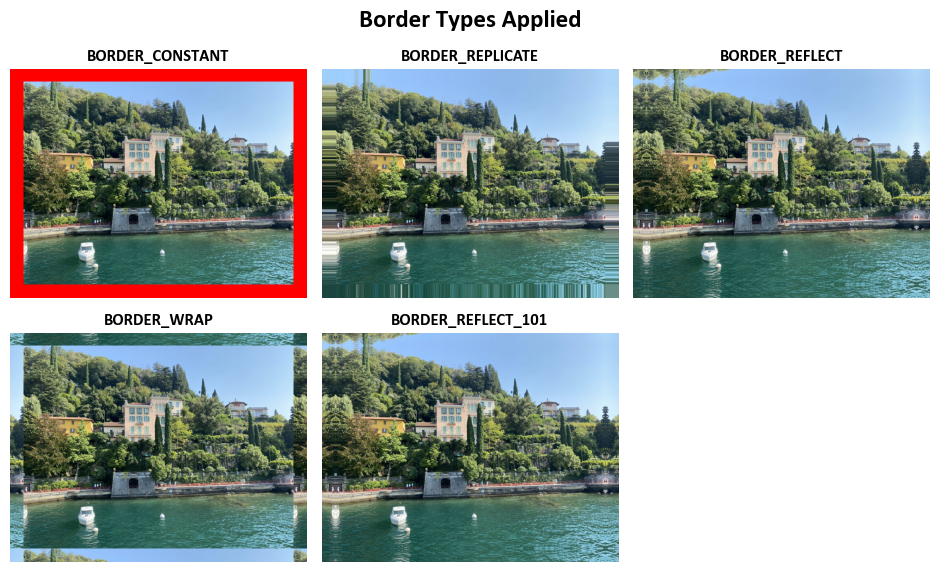

In [5]:
import cv2
import matplotlib.pyplot as plt

# Mapping of OpenCV border types to their descriptive names
cv2_border_dict = {cv2.BORDER_CONSTANT: 'BORDER_CONSTANT',
                   cv2.BORDER_REPLICATE: 'BORDER_REPLICATE',
                   cv2.BORDER_REFLECT: 'BORDER_REFLECT',
                   cv2.BORDER_WRAP: 'BORDER_WRAP',
                   cv2.BORDER_REFLECT_101: 'BORDER_REFLECT_101'}


Red_RGB = (255, 0, 0)
print('Red RGB Color:', Red_RGB)

# Create a 2x3 grid of subplots to display images
fig, ax = plt.subplots(2, 3, figsize=(9.5, 6))
ax = ax.ravel()
fig.delaxes(ax[-1])  # Remove the last subplot (blank)

# Set the title for the overall figure
fig.suptitle('Border Types Applied', weight='bold', fontsize=18)

# Iterate over the different border types and apply them to the image
for i, (border_type, name) in enumerate(cv2_border_dict.items()):
    # Apply the specified border to the image (Images[1]) with padding values
    img_with_border = cv2.copyMakeBorder(Images[1], 100, 100, 100, 100, border_type, value = Red_RGB)
    # value = Red_RGB will be used only if border_type = cv2.BORDER_CONSTANT
    # Display the image with the applied border on the current subplot
    ax[i].imshow(img_with_border)
    ax[i].set_aspect(1)
    ax[i].axis('off')
    ax[i].set_title(name, weight='bold', fontsize=12)

plt.tight_layout()

Here's an explanation of the code:

1. `cv2_border_dict`: This is a dictionary that maps OpenCV border types to their descriptive names. It provides a convenient way to iterate over and display different border types with their names.

1. `Red_RGB`: This variable defines an RGB color value for the color red, represented as (255, 0, 0).

1. Creating Subplots: The code sets up a 2x3 grid of subplots using Matplotlib. The subplots are arranged in a 2x3 grid, and the last subplot is removed using `fig.delaxes(ax[-1])` to create space for other elements.

1. Iterating Over Border Types: The code iterates over different border types using a `for` loop. For each border type, it performs the following steps:

   - `img_with_border = cv2.copyMakeBorder(Images[1], 100, 100, 100, 100, border_type, value=Red_RGB)`: It applies the specified border to an image (`Images[1]`) using the `cv2.copyMakeBorder` function. The function takes several arguments:
     - `Images[1]`: The image to which the border is applied.
     - `100, 100, 100, 100`: These values specify the padding on each side (top, bottom, left, right) of the image.
     - `border_type`: The type of border to apply, as defined in `cv2_border_dict`.
     - `value=Red_RGB`: This argument specifies the color to use for the border, and it is set to red (only used if `border_type` is `cv2.BORDER_CONSTANT`).

   - Displaying the Image: The code displays the image with the applied border on the current subplot using `ax[i].imshow(img_with_border)`. It sets the aspect ratio to 1 to prevent stretching, turns off the axis for a cleaner visualization using `ax[i].axis('off')`, and sets the title of the subplot to the name of the border type.

## Image Blending: Using the `cv2.addWeighted` Function

Image blending is a fundamental technique in image processing that combines two images to create a new composite image. OpenCV provides the `cv2.addWeighted` function, which performs image blending based on a weighted sum of the input images and an additional constant value. Here's an explanation of the blending formula and how it works 
{cite:p}`opencv_library, OpenCVDocumentation`:

The formula for image blending using `cv2.addWeighted` is as follows:

\begin{equation}
dst = \alpha \cdot \text{src1} + \beta \cdot \text{src2} + \gamma
\end{equation}

In this formula:
- `src1` and `src2` are the two input images to be blended.
- $\alpha$ is a weighting factor that determines the influence of `src1` in the final output. It satisfies the condition $0 \leq \alpha \leq 1$, meaning it controls the relative contribution of `src1` to the blended image.
- $\beta = 1 - \alpha$ represents the weighting factor for `src2`, ensuring that the sum of the weights for both images is 1.
- $\gamma$ is an additional constant value that can be added to the blended result. It is an integer value that can be used for brightness adjustment.

The `cv2.addWeighted` function in OpenCV is used for image blending, which combines two input images (`src1` and `src2`) together using a specified weight for each image. The resulting blended image is stored in the destination image (`dst`). Here's an explanation of the function signature:

```
cv2.addWeighted(src1, alpha, src2, beta, gamma, dst) -> None
```

- `src1`: The first source image, which is the primary input image for blending.
- `alpha`: The weight applied to the first source image (`src1`). This value determines the contribution of `src1` to the final result. A larger `alpha` value increases the influence of `src1`.
- `src2`: The second source image, which is the secondary input image for blending.
- `beta`: The weight applied to the second source image (`src2`). This value determines the contribution of `src2` to the final result. A larger `beta` value increases the influence of `src2`.
- `gamma`: A scalar added to the weighted sum of the two source images. This value can be used to control the brightness or contrast of the resulting image.
- `dst`: The destination image, where the blended image is stored. The dimensions of this image should match the dimensions of the input images.

You can see the full description of this function [here](https://docs.opencv.org/3.4/d5/dc4/tutorial_adding_images.html).

The `cv2.addWeighted` function performs a linear combination of the two source images (`src1` and `src2`) based on the specified weights `alpha` and `beta`, and then adds the scalar `gamma` to the resulting sum. The resulting blended image is written to the `dst` image {cite:p}`opencv_library, OpenCVDocumentation`.

This function is commonly used for image fusion, creating special effects, adjusting image brightness and contrast, and other image processing tasks where combining two images with different weights is required. The `alpha` and `beta` values control the influence of each source image, and the `gamma` value can be used to control the overall brightness or contrast of the final image.

<font color='Blue'><b>Example:</b></font>

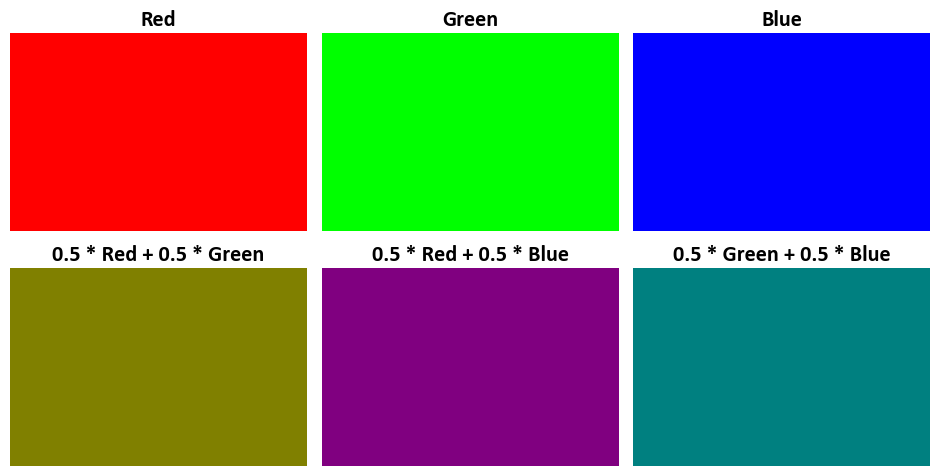

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define the size of the images
size = (100, 150)

# Create two sample images with different color channels
Image_Red = np.zeros((size[0], size[1], 3), dtype=np.uint8)
Image_Red[:,:,0] = 255 * np.ones(size, dtype=np.uint8)

Image_Green = np.zeros((size[0], size[1], 3), dtype=np.uint8)
Image_Green[:,:,1] = 255 * np.ones(size, dtype=np.uint8)

Image_Blue = np.zeros((size[0], size[1], 3), dtype=np.uint8)
Image_Blue[:,:,2] = 255 * np.ones(size, dtype=np.uint8)

# Create a subplot with three rows and two columns for visualization
fig, ax = plt.subplots(2, 3, figsize=(9.5, 5))
ax = ax.ravel()

# Display the first image on the first subplot
_ = ax[0].imshow(Image_Red)
_ = ax[0].set_title('Red', weight='bold')

_ = ax[1].imshow(Image_Green)
_ = ax[1].set_title('Green', weight='bold')

_ = ax[2].imshow(Image_Blue)
_ = ax[2].set_title('Blue', weight='bold')

# Blend the images and display the results
_ = ax[3].imshow(cv2.addWeighted(Image_Red, 0.5, Image_Green, 0.5, 0))
_ = ax[3].set_title('0.5 * Red + 0.5 * Green', weight='bold')

_ = ax[4].imshow(cv2.addWeighted(Image_Red, 0.5, Image_Blue, 0.5, 0))
_ = ax[4].set_title('0.5 * Red + 0.5 * Blue', weight='bold')

_ = ax[5].imshow(cv2.addWeighted(Image_Green, 0.5, Image_Blue, 0.5, 0))
_ = ax[5].set_title('0.5 * Green + 0.5 * Blue', weight='bold')

# Set aspect ratio and turn off axes for all subplots
for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')

# Ensure tight layout
plt.tight_layout()

Here's an explanation of the code:

1. Image Creation: Three sample images are created, each with a single color channel (red, green, or blue). The images are created as NumPy arrays with dimensions (100, 150, 3) to represent an image of size 100x150 pixels with three color channels (red, green, and blue). Each color channel is set to have a maximum intensity (255) for its respective color.

1. Image Blending: The code blends the images in the remaining three subplots. Each blend is created using the `cv2.addWeighted()` function, which takes two images, their weights, and an optional scalar value. The weights control the contribution of each image to the blend. The resulting images are displayed in the subplots with titles indicating the color combination.

<font color='Blue'><b>Example:</b></font>

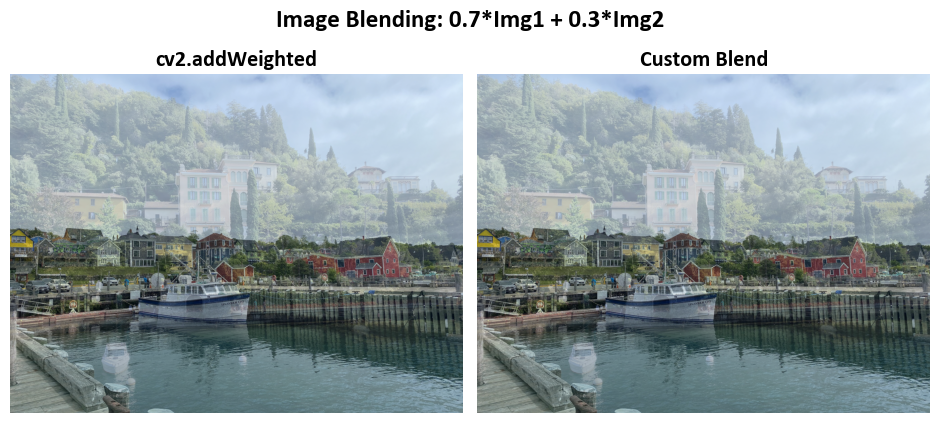

In [7]:
# Import necessary libraries
import numpy as np  # Import numpy for array operations
import matplotlib.pyplot as plt  # Import matplotlib for visualization
import cv2  # Import OpenCV for image processing
alpha = 0.7
beta = 1 - alpha
# Method 1: Using cv2.addWeighted for Image Blending
# Blend two different images using weighted sums
# 0.7 and 0.3 are the weights applied to the first and second image, respectively
# 0 is the scalar value added to the resulting image
augmented_img_01 = cv2.addWeighted(Images[0], alpha, Images[1], beta, 0)

# Method 2: Custom Image Blending
# Blend two different images using custom weighted sums
# We use numpy for element-wise multiplication and addition, rounding the result, and converting to 'uint8' data type
# This technique allows manual control of blending weights
augmented_img_02 = np.round((alpha * Images[0] + beta * Images[1])).astype('uint8')

# Display the original and transformed images with titles
fig, ax = ImShow(Images=[augmented_img_01, augmented_img_02],
                 Names=['cv2.addWeighted', 'Custom Blend'],
                 title= f'Image Blending: {alpha:.1}*Img1 + {beta:.1}*Img2',
                 figsize=(9.5, 4.5))

Here's an explanation of the code:

1. Alpha and Beta Values: Two blending factors, `alpha` and `beta`, are defined to control the weights of the original images. `alpha` is set to 0.7, and `beta` is set to 0.3. These values determine how much of each image contributes to the blend.

1. Method 1: Using `cv2.addWeighted`:
   - In this method, `cv2.addWeighted` is used to blend the two images. This function takes two input images, their corresponding weights (in this case, `alpha` and `beta`), and an optional scalar value (which is set to 0).
   - The result is stored in the variable `augmented_img_01`.

1. Method 2: Custom Image Blending:
   - In this method, custom image blending is performed using NumPy operations.
   - The code calculates the weighted sums of the two images using `alpha` and `beta` and rounds the result to ensure integer values.
   - The result is converted to the 'uint8' data type, suitable for image representation.
   - The blended image is stored in the variable `augmented_img_02`.

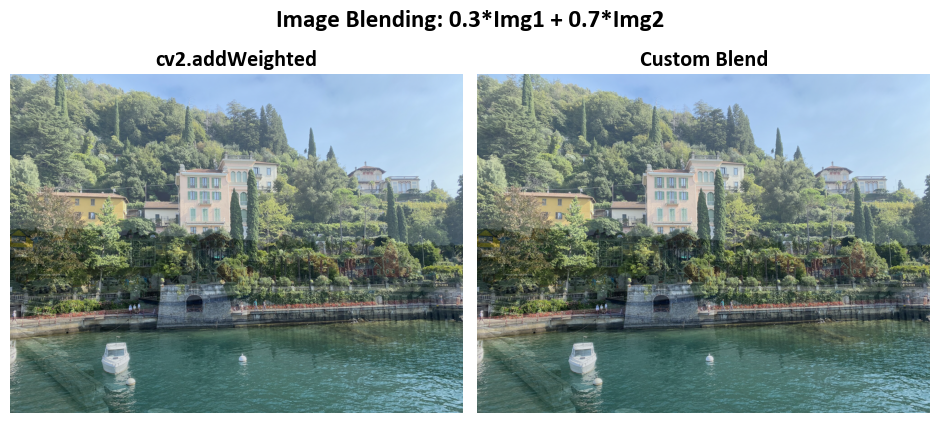

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
alpha = 0.3
beta = 1 - alpha
augmented_img_01 = cv2.addWeighted(Images[0], alpha, Images[1], beta, 0)
augmented_img_02 = np.round((alpha * Images[0] + beta * Images[1])).astype('uint8')
fig, ax = ImShow(Images=[augmented_img_01, augmented_img_02],
                 Names=['cv2.addWeighted', 'Custom Blend'],
                 title= f'Image Blending: {alpha:.1}*Img1 + {beta:.1}*Img2',
                 figsize=(9.5, 4.5))

## Bitwise Operations in OpenCV (Optional Content)


Bitwise operations are fundamental operations in computer programming and image processing that manipulate individual bits within binary representations of data. These operations involve performing logical and mathematical operations at the bit level, which can be particularly useful in tasks such as image manipulation, data compression, encryption, and hardware-level operations. You can perform bitwise operations on integers and use these operations for image processing with libraries like OpenCV. Here's a brief overview of how bitwise operations work in Python:

```{figure} bitwise_op.png
---
width: 600px
align: center
---
Examples of Bitwise Operations.
```

1. **Bitwise AND (`&`) and OR (`|`)**:
   You can use the `&` operator for bitwise AND and the `|` operator for bitwise OR. These operators compare corresponding bits of two integers and produce a new integer where each bit is the result of the corresponding bitwise operation.

In [9]:
# Given integers
a = 21
b = 28

# Print the binary representation of a and b
print('Binary for %i = %s' % (a, bin(a)))
print('Binary for %i = %s' % (b, bin(b)))

# Bitwise AND operation
result_and = a & b  # Bitwise AND: 0001 (1 in decimal)
print('a & b = %i (%s)' % (result_and, bin(result_and)))

# Bitwise OR operation
result_or = a | b   # Bitwise OR: 0111 (7 in decimal)
print('a | b = %i (%s)' % (result_or, bin(result_or)))

Binary for 21 = 0b10101
Binary for 28 = 0b11100
a & b = 20 (0b10100)
a | b = 29 (0b11101)


`````{admonition} Remark
:class: important

To convert a number to its binary representation in Python, you can use the `bin()` function. This function takes an integer as input and returns a string that represents the binary value of that integer, with the "0b" prefix {cite:p}`PythonDocumentation`.

Here's an example:

```python
number = 42
binary_value = bin(number)

print(binary_value)  # Output: '0b101010'
```

If you want to remove the "0b" prefix and get the binary representation as a plain string, you can use string slicing:

```python
number = 42
binary_string = bin(number)[2:]

print(binary_string)  # Output: '101010'
```

If you need to pad the binary representation with leading zeros to a certain length (e.g., 8 bits), you can use the `format()` function with the `'b'` format specifier:

```python
number = 42
binary_padded = format(number, '08b')

print(binary_padded)  # Output: '00101010'
```

The `'08b'` format specifier means:
- `'0'`: The character used for padding (leading zeros).
- `'8'`: The width of the output string (total length).
- `'b'`: Indicates binary representation.


Futhermore, you can convert a binary string to an integer using the `int()` function with the base set to 2. Here's an example:

```python
binary_string = "1101"
integer_value = int(binary_string, 2)
print("Binary:", binary_string)
print("Integer:", integer_value)
```
```
Binary: 1101
Integer: 13
```

This code converts the binary string "1101" to the corresponding integer value, which is 13 in decimal representation. The `int()` function takes two arguments: the first argument is the string containing the binary representation, and the second argument specifies the base, which is 2 for binary. The resulting integer value is then printed.
`````

2. **Bitwise XOR (`^`) and NOT (`~`)**:
   The `^` operator is used for bitwise XOR, which compares corresponding bits and produces a new integer with the XOR result. The `~` operator is used for bitwise NOT, which inverts all bits of an integer.

In [10]:
# Given integers
a = 21
b = 28

# Print the binary representation of a and b
print('Binary for %i = %s' % (a, bin(a)))
print('Binary for %i = %s' % (b, bin(b)))

# Bitwise XOR operation
result_xor = a ^ b
print('a ^ b = %i (%s)' % (result_xor, bin(result_xor)))

# Bitwise NOT operation
result_not = ~a
print('~a  = %i (%s)' % (result_not, bin(result_not)))

Binary for 21 = 0b10101
Binary for 28 = 0b11100
a ^ b = 9 (0b1001)
~a  = -22 (-0b10110)


`````{admonition} Remark
:class: important

When you use the `bin()` function in Python, it returns a string that includes a negative sign (`-`) and the binary representation. This is consistent with the two's complement representation used for signed integers.

Let's break down the example to clarify:

1. Given: `a = 21`. The binary representation of `21` is `10101` (5 bits, assuming 32-bit representation).

2. Applying the bitwise NOT (`~`) operation to `21` inverts each bit: `01010`.

3. Now, let's interpret this result as a signed integer:

   - In binary, `01010` is the binary representation of the decimal value `10`. This is the positive interpretation.
   - However, in signed two's complement representation, to get the negative value, you first invert all the bits and then add 1.

   Inverting `01010`:
   ```
   10101
   ```

   Adding 1 to the inverted value:
   ```
   10110
   ```

4. The result is `-10110`. When you use the `bin()` function to convert this to a binary string, Python includes the negative sign (`-`) and the binary representation, resulting in `-0b10110`.

So, it's important to understand that the `~` operator does perform bitwise inversion, but when the result is interpreted as a signed integer (in two's complement representation), the negative sign is included in the binary string representation. This is why you see `-0b10110` as the output when `~a` is `-22`.
`````

These bitwise operations are fundamental building blocks in binary image manipulation and can be applied to individual pixel values when working with image data. When working with images in OpenCV, you can use these operations to perform tasks such as masking, image blending, and more by applying them to the pixel values of the images.

These operations are particularly efficient and are often used in low-level programming, such as optimizing memory usage, performing pixel-level operations in image processing, and implementing various data manipulation algorithms.

In image processing, bitwise operations can be used for tasks such as creating masks, extracting specific color channels, setting or clearing specific bits, and combining images using logical conditions. In hardware design, bitwise operations are essential for controlling individual bits in registers and memory-mapped devices.

OpenCV provides several essential bitwise operations for manipulating individual bits within arrays. These operations offer the ability to perform logical operations at the bit level, making them useful for various image processing tasks that involve binary data. Here's an explanation of each bitwise operation along with links to their documentation {cite:p}`opencv_library, OpenCVDocumentation`:

### Bitwise AND Operation with `cv2.bitwise_and`

The `cv2.bitwise_and` function in OpenCV is a versatile tool for performing element-wise bitwise conjunction (logical AND) operations between arrays. This function allows you to apply the AND operation between corresponding elements of two input arrays or an array and a scalar. The resulting array, `dst`, has the same size and data type as the input arrays, making it useful for a variety of image processing tasks {cite:p}`opencv_library, OpenCVDocumentation`.

**Key Concepts:**

1. **Operation on Two Arrays (`src1` and `src2` with the same size):**
   - When both input arrays (`src1` and `src2`) have the same size, the function computes the logical AND operation between corresponding elements:
     ```
     dst(I) = src1(I) AND src2(I) if mask(I) ≠ 0
     ```
   - The operation is performed element-wise. Each element in the resulting array `dst` is the result of the logical AND operation between the corresponding elements in `src1` and `src2`.
   - The optional `mask` parameter allows you to selectively apply the operation based on the mask values. If `mask(I)` is non-zero, the operation is applied; otherwise, the corresponding element in `dst` remains unchanged.

2. **Operation on an Array and a Scalar (`src2` as a scalar):**
   - If `src2` is a scalar (a single value), the function computes the bitwise AND operation between each element of `src1` and the scalar value:
     ```
     dst(I) = src1(I) AND src2 if mask(I) ≠ 0
     ```
   - If the number of elements in `src1` matches the number of channels in `src2`, the operation can be performed. The scalar is first converted to an array of the same type as `src1`.

3. **Operation on a Scalar and an Array (`src1` as a scalar):**
   - Similarly, if `src1` is a scalar, the function computes the bitwise AND operation between the scalar value and each element of `src2`:
     ```
     dst(I) = src1 AND src2(I) if mask(I) ≠ 0
     ```
   - If the number of elements in `src2` matches the number of channels in `src1`, the scalar is first converted to an array of the same type as `src2`.

4. **Handling Floating-Point Arrays and Multi-Channel Arrays:**
   - For floating-point input arrays, the machine-specific bit representations (usually IEEE754-compliant) are used for the operation.
   - When dealing with multi-channel input arrays (e.g., a color image with separate channels), the operation is applied independently to each channel.

**Function Syntax**:
```
cv2.bitwise_and(src1, src2[, dst[, mask]]) -> dst
```

**Description**:
The `cv2.bitwise_and` function is part of the OpenCV library in Python, and it performs element-wise bitwise AND operations between two input arrays `src1` and `src2`. An optional `mask` can be provided to specify the region where the operation is applied. The result of the operation is stored in the output array `dst`.

**Parameters**:
- `src1`: The first input array (image) on which the bitwise AND operation is applied.
- `src2`: The second input array (image) on which the bitwise AND operation is applied.
- `dst` (optional): The output array to store the result of the operation. If not provided, the function creates a new array.
- `mask` (optional): A mask specifying the region where the operation should be performed. The dimensions of the mask must match the dimensions of `src1` and `src2`.

**Return**:
- `dst`: The output array containing the result of the bitwise AND operation between `src1` and `src2`. If `dst` is provided as an argument, the function stores the result in `dst`. Otherwise, a new array is created to hold the result.

**Usage**:
The `cv2.bitwise_and` function is commonly used in image processing to perform bitwise AND operations on corresponding pixels of two images. This can be useful for tasks such as masking or extracting specific regions of interest (ROI) from an image based on a provided mask.

For more detailed information on `cv2.bitwise_and`, you can refer to the [OpenCV documentation](https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#bitwise-and).

<font color='Blue'><b>Example:</b></font>

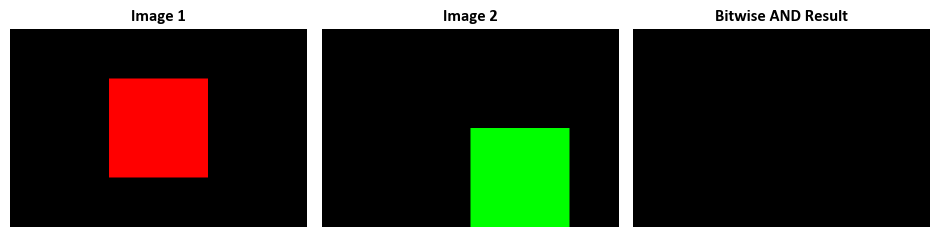

In [11]:
# Create two sample images with different shapes
Image1 = np.zeros((200, 300, 3), dtype=np.uint8)
Image1[50:150, 100:200, :] = [255, 0, 0]  # Blue region

Image2 = np.zeros((200, 300, 3), dtype=np.uint8)
Image2[100:200, 150:250, :] = [0, 255, 0]  # Green region

# Perform a bitwise AND operation between the two images
Result = cv2.bitwise_and(Image1, Image2)

# Create a subplot with three images for visualization
fig, ax = plt.subplots(1, 3, figsize=(9.5, 5))

# Display the first image on the first subplot
_ = ax[0].imshow(Image1)
_ = ax[0].set_title('Image 1', weight = 'bold', fontsize=12)

# Display the second image on the second subplot
_ = ax[1].imshow(Image2)
_ = ax[1].set_title('Image 2', weight = 'bold', fontsize=12)

# Display the result of the bitwise AND operation on the third subplot
_ = ax[2].imshow(Result)
_ = ax[2].set_title('Bitwise AND Result', weight = 'bold', fontsize=12)

# Set aspect ratio and turn off axes for all subplots
for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')

plt.tight_layout()

The provided code snippet generates three images and displays them using Matplotlib subplots. It uses the OpenCV library to perform a bitwise AND operation between two sample images, creating a new resulting image. Let's break down the code step by step:

1. **Creating Sample Images:**
   The code creates two sample images with different shapes, both initialized as black images (all pixel values are set to zero). These images are represented as NumPy arrays with dimensions (200, 300, 3), where 200 is the height, 300 is the width, and 3 represents the three color channels (red, green, blue) for each pixel.

   - **Image1:** A blue region (pixels with blue color, [255, 0, 0]) is set within the region defined by [50:150, 100:200].
   - **Image2:** A green region (pixels with green color, [0, 255, 0]) is set within the region defined by [100:200, 150:250].

2. **Bitwise AND Operation:**
   The code performs a bitwise AND operation between Image1 and Image2 using OpenCV's `cv2.bitwise_and` function. This operation combines the two images, preserving only the regions where both images have non-zero (i.e., colored) pixels. The result is stored in the "Result" variable.

### Element-Wise Bitwise OR with `cv2.bitwise_or`

The `cv2.bitwise_or` function in OpenCV is a powerful tool for performing an element-wise bitwise disjunction (logical OR) operation on input arrays. This operation combines the binary representation of each element in the input arrays, producing a new array with the same size and data type as the input arrays. Here's a detailed breakdown of how `cv2.bitwise_or` behaves {cite:p}`opencv_library, OpenCVDocumentation`:

**1. Operation on Two Arrays (`src1` and `src2` with the same size):**
   - When both input arrays (`src1` and `src2`) have the same size, the function computes the logical disjunction (bitwise OR) between corresponding elements:
     ```
     dst(I) = src1(I) OR src2(I) if mask(I) ≠ 0
     ```
   - The operation is performed element-wise. Each element in the resulting array `dst` is the result of the logical OR operation between the corresponding elements in `src1` and `src2`.
   - The optional `mask` parameter allows for selective application of the operation based on the mask values. If `mask(I)` is non-zero, the operation is applied; otherwise, the corresponding element in `dst` remains unchanged.

**2. Operation on an Array and a Scalar (`src2` as a scalar):**
   - If `src2` is a scalar (a single value), the function computes the bitwise OR operation between each element of `src1` and the scalar value:
     ```
     dst(I) = src1(I) OR src2 if mask(I) ≠ 0
     ```
   - If the number of elements in `src1` matches the number of channels in `src2`, the operation can be performed. The scalar is first converted to an array of the same type as `src1`.

**3. Operation on a Scalar and an Array (`src1` as a scalar):**
   - Similarly, if `src1` is a scalar, the function computes the bitwise OR operation between the scalar value and each element of `src2`:
     ```
     dst(I) = src1 OR src2(I) if mask(I) ≠ 0
     ```
   - If the number of elements in `src2` matches the number of channels in `src1`, the scalar is first converted to an array of the same type as `src2`.

**4. Handling Floating-Point Arrays and Multi-Channel Arrays:**
   - For floating-point input arrays, the machine-specific bit representations (usually IEEE754-compliant) are used for the operation.
   - If the input arrays are multi-channel (e.g., a color image with separate channels), the operation is applied independently to each channel.

**Function Syntax**:
```python
cv2.bitwise_or(src1, src2[, dst[, mask]]) -> dst
```

**Description**:
The `cv2.bitwise_or` function is part of the OpenCV library in Python. It performs the element-wise bitwise disjunction (OR operation) between two input arrays `src1` and `src2`. An optional `mask` can be provided to specify the region where the operation is to be applied. The result of the operation is stored in the output array `dst`.

**Parameters**:
- `src1`: The first input array (image) on which the bitwise OR operation is applied.
- `src2`: The second input array (image) on which the bitwise OR operation is applied.
- `dst` (optional): The output array used to store the result of the operation. If not provided, the function creates a new array.
- `mask` (optional): A mask specifying the region where the operation should be performed. The dimensions of the mask must match the dimensions of `src1` and `src2`.

**Return**:
- `dst`: The output array containing the result of the bitwise OR operation applied to the input `src1` and `src2`. If `dst` is provided as an argument, the function stores the result in `dst`. Otherwise, a new array is created to hold the result.

**Usage**:
The `cv2.bitwise_or` function is commonly used in image processing to perform logical OR operations on corresponding pixels of two images. It's often used to combine binary data or create masks. By providing a mask, you can control which regions of the input images are subject to the bitwise OR operation.

For further details on `bitwise_or`, refer to the [OpenCV documentation](https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#bitwise-or).

<font color='Blue'><b>Example:</b></font>

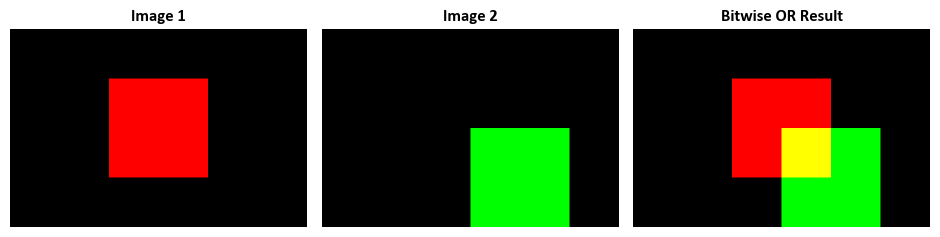

In [12]:
# Create two sample images with different shapes
Image1 = np.zeros((200, 300, 3), dtype=np.uint8)
Image1[50:150, 100:200, :] = [255, 0, 0]  # Blue region

Image2 = np.zeros((200, 300, 3), dtype=np.uint8)
Image2[100:200, 150:250, :] = [0, 255, 0]  # Green region

# Perform a bitwise OR operation between the two images
Result = cv2.bitwise_or(Image1, Image2)

# Create a subplot with three images for visualization
fig, ax = plt.subplots(1, 3, figsize=(9.5, 5))

# Display the first image on the first subplot
_ = ax[0].imshow(Image1)
_ = ax[0].set_title('Image 1', weight = 'bold', fontsize=12)

# Display the second image on the second subplot
_ = ax[1].imshow(Image2)
_ = ax[1].set_title('Image 2', weight = 'bold', fontsize=12)

# Display the result of the bitwise OR operation on the third subplot
_ = ax[2].imshow(Result)
_ = ax[2].set_title('Bitwise OR Result', weight = 'bold', fontsize=12)

# Set aspect ratio and turn off axes for all subplots
for i in range(len(ax)):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')
    
plt.tight_layout()

The provided code snippet generates three images and displays them using Matplotlib subplots. It utilizes OpenCV's bitwise OR operation to combine pixel values from two sample images. Let's break down the code step by step:

1. **Creating Sample Images:**
   - Two sample images, `Image1` and `Image2`, are created using NumPy. Both images have dimensions (200, 300, 3), which means they are 200 pixels in height, 300 pixels in width, and have 3 color channels (red, green, blue) for each pixel.
   - In `Image1`, a blue region is created by assigning the value [255, 0, 0] (pure blue) to a specific rectangular region ([50:150, 100:200]) within the image.
   - In `Image2`, a green region is created by assigning the value [0, 255, 0] (pure green) to a specific rectangular region ([100:200, 150:250]) within the image.

2. **Bitwise OR Operation:**
   - The code performs a bitwise OR operation between `Image1` and `Image2` using OpenCV's `cv2.bitwise_or` function. This operation combines the two images by taking the maximum pixel value for each channel at corresponding pixel locations. The result is stored in the "Result" variable.

`````{admonition} Note
:class: warning

In this context, we have discussed two fundamental bitwise operations, `cv2.bitwise_and` and `cv2.bitwise_or`. Nevertheless, it's important to note that the OpenCV library offers a suite of fundamental bitwise operations for image processing, including `cv2.bitwise_and`, `cv2.bitwise_not`, `cv2.bitwise_or`, and `cv2.bitwise_xor`. To gain a comprehensive understanding, let's explore the distinctions and commonalities among these operations briefly:

1. **`cv2.bitwise_and(src1, src2[, dst[, mask]])`**:
   - **Function**: Performs a bitwise AND operation between corresponding pixels of two input images (src1 and src2).
   - **Usage**: This operation results in an output image where the corresponding pixels are retained if both corresponding pixels in the input images are non-zero.
   - **Similarity**: Similar to the logical AND operation but operates at the bit level for each pixel in the images.
   
2. **`cv2.bitwise_not(src[, dst[, mask]])`**:
   - **Function**: Inverts every bit of the input image (src).
   - **Usage**: This operation results in an output image where all the 1s (white pixels) in the input image become 0s (black pixels), and vice versa.
   - **Similarity**: Similar to the logical NOT operation but operates at the bit level for each pixel in the image.

3. **`cv2.bitwise_or(src1, src2[, dst[, mask]])`**:
   - **Function**: Performs a bitwise OR operation between corresponding pixels of two input images (src1 and src2).
   - **Usage**: This operation results in an output image where the corresponding pixels are retained if at least one of the corresponding pixels in the input images is non-zero.
   - **Similarity**: Similar to the logical OR operation but operates at the bit level for each pixel in the images.

4. **`cv2.bitwise_xor(src1, src2[, dst[, mask]])`**:
   - **Function**: Performs a bitwise XOR (exclusive OR) operation between corresponding pixels of two input images (src1 and src2).
   - **Usage**: This operation results in an output image where the corresponding pixels are retained if the corresponding pixels in the input images are different (one is 0 and the other is 1).
   - **Similarity**: Similar to the logical XOR operation but operates at the bit level for each pixel in the images.

**Differences**:
- The primary difference lies in the specific bitwise operation each function performs (AND, NOT, OR, XOR) on the corresponding pixels.
- The `bitwise_and` and `bitwise_or` functions retain specific pixel combinations based on the logical AND and OR conditions, respectively.
- The `bitwise_not` function inverts the bits of the input image.
- The `bitwise_xor` function retains pixels only when there is a difference between the corresponding pixels in the input images.

**Similarities**:
- All these operations work at the bit level, meaning they operate on individual bits of the pixel values.
- They are useful for various image processing tasks, including masking, combining regions, and altering specific aspects of images based on pixel values.
- They allow for fine-grained control over pixel manipulation in image processing tasks.

`````

## Colorspace Conversion with `cv2.cvtColor()`

The `cv2.cvtColor()` function in the Python OpenCV library is a powerful tool for changing the colorspace of an input image or rearranging its image channels. It allows you to convert an input image (source) from one colorspace to another, based on a specified color conversion code. The resulting image can be stored in the output (destination) image, if provided, or a new image is created to hold the converted result {cite:p}`opencv_library, OpenCVDocumentation`.

Here's an in-depth explanation of the parameters and the purpose of this function:

- `src`: This parameter represents the input image (source) that you intend to convert. It should be a numpy array, effectively representing the image you want to transform.

- `code`: The `code` parameter specifies the color conversion code or the type of transformation that defines how the input image's colors will be converted. This code is an integer value corresponding to a specific colorspace conversion or channel rearrangement. For example, `cv2.COLOR_BGR2GRAY` indicates converting from the BGR colorspace to grayscale. The available conversion codes are defined in OpenCV's documentation.

- `dst` (optional): The `dst` parameter serves as the output image (destination) where the result of the colorspace conversion will be stored. If this parameter is not provided, a new image will be created to store the converted result.

- `dstCn` (optional): The `dstCn` parameter specifies the number of channels in the destination image. It is used when you want to change the number of channels in the output image. If this parameter is not specified, it defaults to 0, and the number of channels is inferred based on the conversion code.

Here's the structure of the function signature:

```python
cv2.cvtColor(src, code[, dst[, dstCn]]) -> dst
```

The `cv2.cvtColor()` function provides a versatile way to transform images between various colorspace representations, such as RGB, grayscale, HSV, YUV, and more. It is a fundamental operation in image processing that enables you to adapt images to different processing techniques or to analyze them from various color perspectives.

For more detailed information and the list of available color conversion codes, you can refer to the [OpenCV documentation on `cvtColor`](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#cvtcolor). This function plays a crucial role in image manipulation and analysis, allowing you to work with images in different colorspaces, which is essential in various computer vision and image processing tasks.

### RGB to Grayscale

To convert an image from the RGB (Red, Green, Blue) color space to grayscale, you can use the `cv2.cvtColor()` function from the OpenCV library with the appropriate color conversion code.


The `cv2.cvtColor()` function, which is part of the OpenCV library, transforms an RGB (Red, Green, Blue) image to grayscale using a well-defined mathematical formula. This operation is widely used in image processing and computer vision applications.

The process of converting an RGB image to grayscale involves weighted averaging of the color channels (R, G, and B). The formula used by `cv2.cvtColor()` is as follows:

```
Grayscale Value (G) = 0.299 * Red (R) + 0.587 * Green (G) + 0.114 * Blue (B)
```

In this formula, the coefficients 0.299, 0.587, and 0.114 are specific weights assigned to the Red, Green, and Blue channels, respectively. These weights are based on the human perception of color, as the human eye is more sensitive to green and less sensitive to blue when perceiving grayscale intensity. Please see [this link](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#cvtcolor) for more details.

`````{admonition} Note
:class: warning
Note that      
        
```python
# Load a set of sample images and store them in the 'Images' array.
Images = load_sample_images()['images']

# Select the first image from the 'Images' array and assign it to 'Img'.
Img = Images[0]

# Calculate the grayscale version of the image using custom weighted conversion.
# The formula 0.299 * R + 0.587 * G + 0.114 * B is employed for each pixel.
Img_GrayScale_ = 0.299 * Img[:, :, 0] + 0.587 * Img[:, :, 1] + 0.114 * Img[:, :, 2]
Img_GrayScale_ = Img_GrayScale_.astype(int)

# Utilize OpenCV's inbuilt function to convert 'Img' to grayscale using the BGR to Gray transformation.
Img_GrayScale_cv2 = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)

```

These two methods yield different slightly results when converting an image to grayscale
`````

<font color='Blue'><b>Example:</b></font>

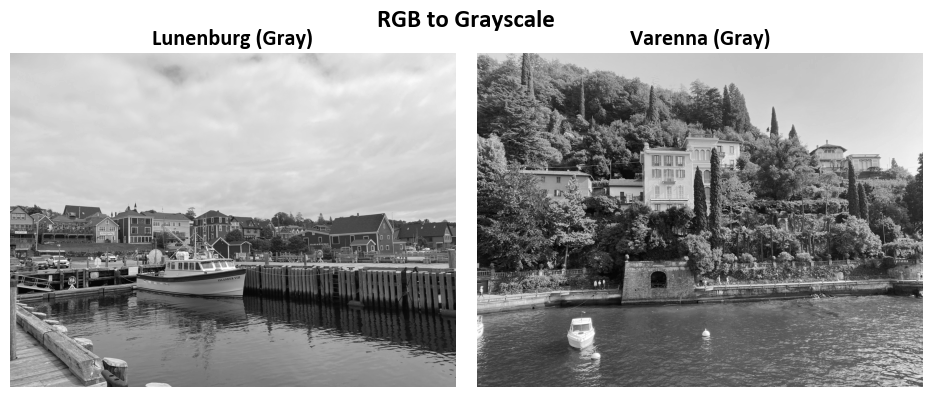

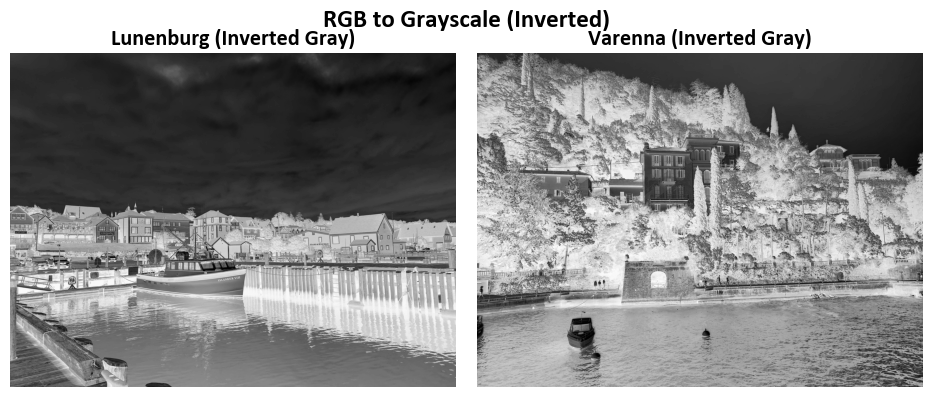

In [13]:
# Note that `Images` and `Names` were defined in the first example.

# Convert RGB to Grayscale
gray_images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in Images]
# Convert each RGB image in the list `Images` to grayscale using cv2.COLOR_BGR2GRAY
inverted_gray_images = [cv2.bitwise_not(image) for image in gray_images]
# Invert the colors of the grayscale images using bitwise_not to create inverted grayscale images

# Create titles for the images
gray_titles = [f'{name} (Gray)' for name in Names]
# Create titles for grayscale images by adding "(Gray)" to the original image names
inverted_gray_titles = [f'{name} (Inverted Gray)' for name in Names]
# Create titles for inverted grayscale images by adding "(Inverted Gray)" to the original image names

# Note: Grayscale images only have one color channel (band).
# Plot the images
_, _ = ImShow(gray_images, gray_titles, title='RGB to Grayscale', grayscale=True)
# Display the grayscale images using the ImShow function with appropriate titles and a grayscale flag
_, _ = ImShow(inverted_gray_images, inverted_gray_titles, title='RGB to Grayscale (Inverted)', grayscale=True)
# Display the inverted grayscale images using the ImShow function with appropriate titles and a grayscale flag

`````{admonition} Note
:class: warning
Grayscale images only have one color channel (band).

`````

### RGB to HSV

Converting an image from the RGB (Red, Green, Blue) color space to the HSV (Hue, Saturation, Value) color space is a common operation in image processing. The HSV color space separates the color information into three components: hue (the color itself), saturation (the intensity of the color), and value (the brightness). Here's how to perform the RGB to HSV conversion using OpenCV in Python:

<font color='Blue'><b>Example:</b></font>

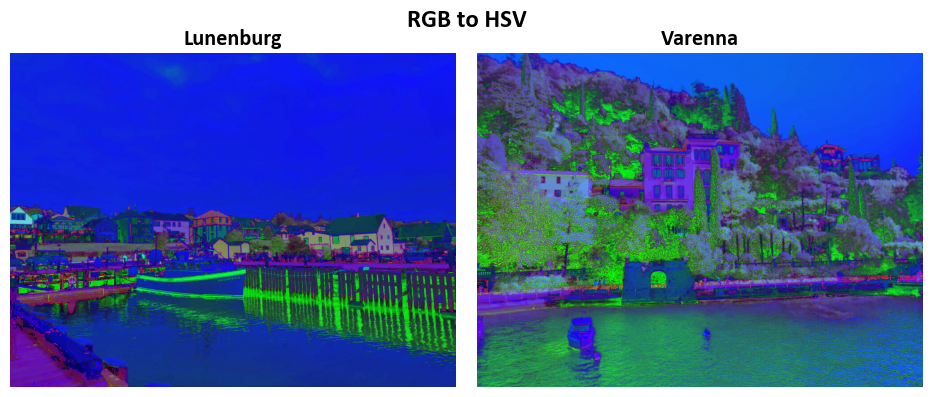

In [14]:
# Note that `Images` and `Names` were defined in the first example.

# Convert Images from RGB to HSV color space
augmented_images_hsv = [cv2.cvtColor(image, cv2.COLOR_BGR2HSV) for image in Images]

# Display the augmented images in HSV color space
_ = ImShow(augmented_images_hsv, Names, title='RGB to HSV')